# **install library**

In [1]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 15.4 MB/s 


In [2]:
pip install GoogleNews

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 292 kB 8.3 MB/s 
     |████████████████████████████████| 749 kB 25.9 MB/s 
  Attempting uninstall: regex
    Found existing installation: regex 2022.6.2
    Uninstalling regex-2022.6.2:
      Successfully uninstalled regex-2022.6.2


In [3]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.8 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


# **read data from yahoo finace**

In [4]:
# import pandas as pd
# data_main=pd.read_csv("data.csv")

In [5]:
import yfinance as yf
data_main = yf.download(tickers='BTC-USD', period = '3000d', interval = '1d')
data_main

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2022-11-13,16799.722656,16920.765625,16320.634766,16353.365234,16353.365234,27209183682
2022-11-14,16352.028320,17109.324219,15872.941406,16618.199219,16618.199219,49630243054
2022-11-15,16617.484375,17051.962891,16542.550781,16884.613281,16884.613281,36599436183


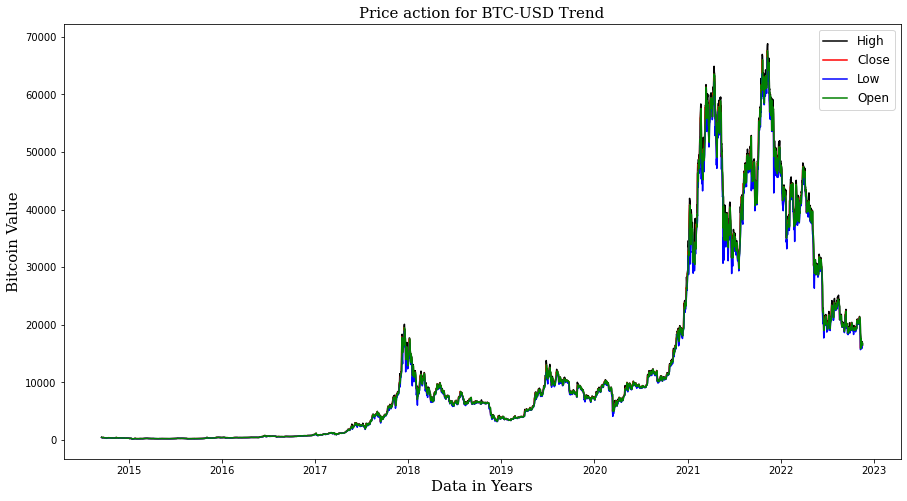

In [6]:
import matplotlib.pyplot as plt
lst_name=["High","Close","Low","Open"]
plt.figure(figsize=(15,8))
plt.plot( data_main[lst_name[0]],"k-")
plt.plot( data_main[lst_name[1]],"r-")
plt.plot( data_main[lst_name[2]],"b-")
plt.plot( data_main[lst_name[3]],"g-")
plt.legend(lst_name,fontsize=12)
plt.title('Price action for BTC-USD Trend', fontname='serif', fontsize=15)
plt.xlabel('Data in Years', fontname='serif', fontsize=15)
plt.ylabel('Bitcoin Value', fontname='serif', fontsize=15)
plt.show()

# **get news of GoogleNews**

In [7]:
import time
import urllib
import requests
import bs4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from GoogleNews import GoogleNews
import datetime
from datetime import timedelta,date
import time
import datetime
from dateutil.relativedelta import relativedelta

def get_past_date(str_days_ago):
    TODAY = datetime.date.today()
    splitted = str_days_ago.split()
    if len(splitted) == 1 and splitted[0].lower() == 'today':
        return str(TODAY.isoformat())
    elif len(splitted) == 1 and splitted[0].lower() == 'yesterday':
        date = TODAY - relativedelta(days=1)
        return str(date.isoformat())
    elif splitted[1].lower() in ['hour', 'hours', 'hr', 'hrs', 'h']:
        date = datetime.datetime.now() - relativedelta(hours=int(splitted[0]))
        return str(date.date().isoformat())
    elif splitted[1].lower() in ['day', 'days', 'd']:
        date = TODAY - relativedelta(days=int(splitted[0]))
        return str(date.isoformat())
    elif splitted[1].lower() in ['wk', 'wks', 'week', 'weeks', 'w']:
        date = TODAY - relativedelta(weeks=int(splitted[0]))
        return str(date.isoformat())
    elif splitted[1].lower() in ['mon', 'mons', 'month', 'months', 'm']:
        date = TODAY - relativedelta(months=int(splitted[0]))
        return str(date.isoformat())
    elif splitted[1].lower() in ['yrs', 'yr', 'years', 'year', 'y']:
        date = TODAY - relativedelta(years=int(splitted[0]))
        return str(date.isoformat())
    else:
        return str_days_ago

In [8]:
from tqdm import tqdm

news_google1=[]
start_date = date(2022, 10, 1)
end_date=date(2022, 10, 28)

day_count=(end_date-start_date).days
max_page_news=2
for data_search in tqdm(start_date + timedelta(n) for n in range(day_count)):
  st= data_search.strftime("%m/%d/%Y")
  googlenews=GoogleNews(start=st,end=st)
  googlenews.search('btc forex news')
  googlenews.page_at(max_page_news)
  result=googlenews.result()
  #time.sleep(15)
  for j in range(len(result)):
    feild=[]
    tiltle_news=result[j]["title"]
    link_news=result[j]["link"]
    date_news=result[j]["date"]
    feild.append(date_news)
    feild.append(tiltle_news)
    feild.append(link_news)
    news_google1.append(feild)

18it [00:25,  1.07it/s]

'NoneType' object is not iterable


19it [00:25,  1.22it/s]

'NoneType' object is not iterable


20it [00:26,  1.25it/s]

'NoneType' object is not iterable


21it [00:27,  1.33it/s]

'NoneType' object is not iterable
'NoneType' object is not iterable


22it [00:27,  1.42it/s]

'NoneType' object is not iterable


23it [00:28,  1.46it/s]

'NoneType' object is not iterable


24it [00:29,  1.54it/s]

'NoneType' object is not iterable


25it [00:29,  1.51it/s]

'NoneType' object is not iterable
'NoneType' object is not iterable


26it [00:30,  1.57it/s]

'NoneType' object is not iterable


27it [00:31,  1.16s/it]

'NoneType' object is not iterable


In [9]:
# convert to dataset
data_news_all=pd.DataFrame(news_google1,columns=["Date","news","link"]) 
# convert string date to date time 
data_news_all["Date"]=data_news_all["Date"].apply(lambda x:get_past_date(x))
# convert to datetime
data_news_all['Date'] = pd.to_datetime(data_news_all['Date'],errors='coerce')
# group by days news
data_news_day=data_news_all.groupby(data_news_all['Date'].dt.date,
                            as_index = True).agg( date=('Date','first'),
                                                   news=('news',' '.join))
data_news_day.drop("date",axis=1,inplace=True)
data_news_day

,news
Date,
2022-10-17,Bitcoin price is going nowhere without a break...
2022-10-20,What Is DeFi Lending and How Does It Work? – C...
2022-10-27,"Weekly Forex Forecast – Bitcoin,Oil,EUR/USD,GB..."


In [10]:
data_news_all

,Date,news,link
0,2022-10-17,Bitcoin price is going nowhere without a break...,https://www.fxstreet.com/cryptocurrencies/news...
1,2022-10-17,Bitcoin Price Prediction: BTC/USD Could Obtain...,https://insidebitcoins.com/news/bitcoin-price-...
2,2022-10-17,Scientists Say Bitcoin Mining is as Bad as Rea...,https://www.business2community.com/crypto-news...
3,2022-10-17,Net Bitcoin ATMs growth drops globally for the...,https://www.investing.com/news/cryptocurrency-...
4,2022-10-17,Uniglo.io (GLO) Draws Attention With Bullish P...,https://bitcoinist.com/uniglo-io-glo-draws-att...
...,...,...,...
182,2022-10-27,Forex Signals Brief Oct 24: BOC and ECB to Res...,https://www.fxleaders.com/news/2022/10/24/fore...
183,2022-10-27,Crypto Signals Brief for October 25: A Bullish...,https://www.fxleaders.com/news/2022/10/25/cryp...
184,2022-10-27,This Company Is Changing The DeFi Game By Brin...,https://finance.yahoo.com/news/company-changin...
185,2022-10-27,Bitcoin Remains Tight at $19K Level With Low V...,https://forextv.com/bitcoin-news/bitcoin-remai...


In [11]:
# from tqdm import tqdm

# news_google2=[]
# start_date = date(2022, 9, 20)
# end_date=date(2022, 11, 3)

# day_count=(end_date-start_date).days
# max_page_news=2
# for data_search in tqdm(start_date + timedelta(n) for n in range(day_count)):
#   st= data_search.strftime("%m/%d/%Y")
#   googlenews=GoogleNews(start=st,end=st)
#   googlenews.search('btc bitcoin')
#   googlenews.page_at(max_page_news)
#   result=googlenews.result()
#   #time.sleep(15)
#   for j in range(len(result)):
#     feild=[]
#     tiltle_news=result[j]["title"]
#     link_news=result[j]["link"]
#     date_news=result[j]["date"]
#     feild.append(date_news)
#     feild.append(tiltle_news)
#     feild.append(link_news)
#     news_google2.append(feild)


In [12]:
# # convert to dataset
# data_news_all=pd.DataFrame(news_google2,columns=["Date","news","link"]) 
# # convert string date to date time 
# data_news_all["Date"]=data_news_all["Date"].apply(lambda x:get_past_date(x))
# # convert to datetime
# data_news_all['Date'] = pd.to_datetime(data_news_all['Date'],errors='coerce')
# # group by days news
# data_news_day=data_news_all.groupby(data_news_all['Date'].dt.date,
#                             as_index = True).agg( date=('Date','first'),
#                                                    news=('news',' '.join))
# data_news_day.drop("date",axis=1,inplace=True)
# data_news_day

# **vaderSentiment**

In [13]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
def cal_sentiment(x):
  #print('-')
  score=sia.polarity_scores(x)
  compound=score["compound"]
  neg=score["neg"]
  neu=score["neu"]
  pos=score["pos"]
  out_pd=pd.Series([compound,neg,neu,pos],
            index=['score','neg','neu',"pos"])
  
  return out_pd

data_news_day[['score','neg','neu',"pos"]]=data_news_day["news"].apply(lambda x:cal_sentiment(x))
data_news_sentiment=data_news_day.copy()
data_news_sentiment

,news,score,neg,neu,pos
Date,,,,,
2022-10-17,Bitcoin price is going nowhere without a break...,0.9897,0.041,0.889,0.070
2022-10-20,What Is DeFi Lending and How Does It Work? – C...,0.6124,0.000,0.886,0.114
2022-10-27,"Weekly Forex Forecast – Bitcoin,Oil,EUR/USD,GB...",-0.2732,0.030,0.970,0.000


In [14]:
data_main["date"]=pd.to_datetime(data_main.index)
data_news_sentiment["date"]=pd.to_datetime(data_news_sentiment.index)
data_main.reset_index(drop = True, inplace = True)
data_news_sentiment.reset_index(drop = True, inplace = True)


In [15]:
data_final=pd.merge(data_main,data_news_sentiment, on="date",how="left")
data_final=data_final.fillna(0)
data_final.replace(np.inf,0,inplace=True)
data_final

,Open,High,Low,Close,Adj Close,Volume,date,news,score,neg,neu,pos
0,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,2014-09-17,0,0.0,0.0,0.0,0.0
1,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,2014-09-18,0,0.0,0.0,0.0,0.0
2,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,2014-09-19,0,0.0,0.0,0.0,0.0
3,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,2014-09-20,0,0.0,0.0,0.0,0.0
4,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,2014-09-21,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2979,16799.722656,16920.765625,16320.634766,16353.365234,16353.365234,27209183682,2022-11-13,0,0.0,0.0,0.0,0.0
2980,16352.028320,17109.324219,15872.941406,16618.199219,16618.199219,49630243054,2022-11-14,0,0.0,0.0,0.0,0.0
2981,16617.484375,17051.962891,16542.550781,16884.613281,16884.613281,36599436183,2022-11-15,0,0.0,0.0,0.0,0.0
2982,16884.341797,16960.294922,16430.111328,16669.439453,16669.439453,33925512989,2022-11-16,0,0.0,0.0,0.0,0.0


# **Normalization**

In [16]:
data_ready=data_final[["Close","score"]].copy()
data_ready = data_ready.sort_index(ascending=True, axis=0)
data_ready

,Close,score
0,457.334015,0.0
1,424.440002,0.0
2,394.795990,0.0
3,408.903992,0.0
4,398.821014,0.0
...,...,...
2979,16353.365234,0.0
2980,16618.199219,0.0
2981,16884.613281,0.0
2982,16669.439453,0.0


In [17]:
# pred=lstm_model.predict(x_test)

In [18]:
from sklearn.preprocessing import MinMaxScaler
data_normal=data_ready.copy()
sce=MinMaxScaler(feature_range=(-1,1))
for col_name in (data_ready.columns):
  print(col_name)
  data_col=data_ready[col_name].values.reshape(-1,1)
  data_normal[col_name]=sce.fit_transform(data_col)


Close
score


# **split data and window**

In [19]:
win=60
data_hybrid=data_normal.values
trian_Percentage=0.70
idx=round(data_hybrid.shape[0]*trian_Percentage)
data_train=data_hybrid[0:idx,:]
data_test=data_hybrid[idx-60:,:]

print("_"*50)
print('-> data_train  shape = {0}'.format(data_train.shape))
print('-> data_test   shape = {0}'.format(data_test.shape))
print("_"*50)

__________________________________________________
-> data_train  shape = (2089, 2)
-> data_test   shape = (955, 2)
__________________________________________________


In [20]:
#create window

x_train, y_train = [], []
for i in range(win,data_train.shape[0]):
    x_train.append(data_train[i-win:i,:])
    y_train.append(data_train[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

print("_"*50)
print('-> x_train  shape = {0}'.format(x_train.shape))
print('-> y_train   shape = {0}'.format(y_train.shape))
print("_"*50)

#create window test
x_test, y_test = [], []
for i in range(win,data_test.shape[0]):
    x_test.append(data_test[i-win:i,:])
    y_test.append(data_test[i,0])
x_test, y_test = np.array(x_test), np.array(y_test)

print("_"*50)
print('-> x_test  shape = {0}'.format(x_test.shape))
print('-> y_test   shape = {0}'.format(y_test.shape))
print("_"*50)

__________________________________________________
-> x_train  shape = (2029, 60, 2)
-> y_train   shape = (2029,)
__________________________________________________
__________________________________________________
-> x_test  shape = (895, 60, 2)
-> y_test   shape = (895,)
__________________________________________________


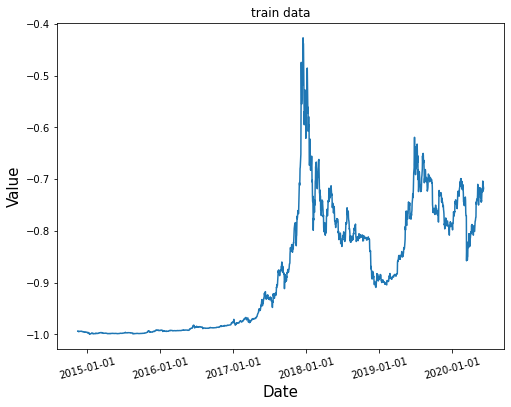

In [21]:
from matplotlib.dates import DateFormatter
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(data_main["date"][win:idx],y_train)
myFmt = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(myFmt)
plt.setp(ax.get_xticklabels(), rotation = 15)
plt.title("train data")
plt.xlabel('Date', fontsize=15)
plt.ylabel('Value', fontsize=15)
plt.show()

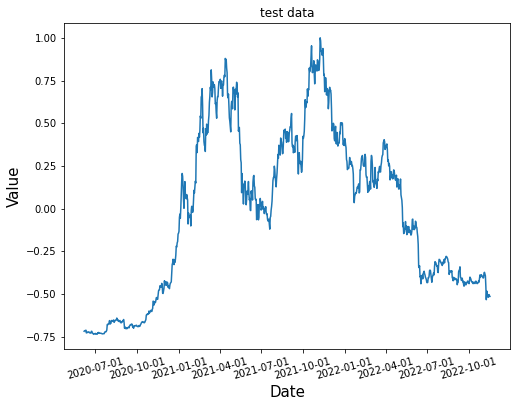

In [22]:
from matplotlib.dates import DateFormatter
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(data_main["date"][idx:],y_test)
myFmt = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(myFmt)
plt.setp(ax.get_xticklabels(), rotation = 15)
plt.title("test data")
plt.xlabel('Date', fontsize=15)
plt.ylabel('Value', fontsize=15)
plt.show()

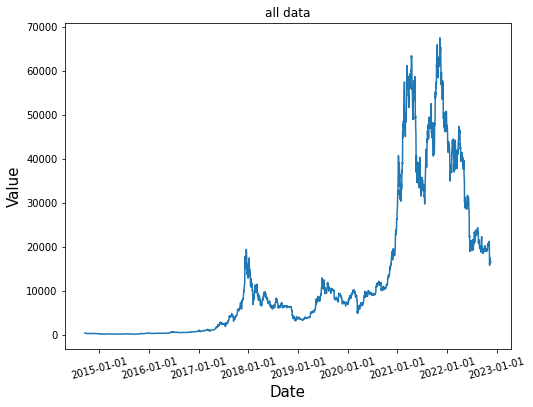

In [23]:
from matplotlib.dates import DateFormatter
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(data_main["date"],data_ready["Close"])
myFmt = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(myFmt)
plt.setp(ax.get_xticklabels(), rotation = 15)
plt.title("all data")
plt.xlabel('Date', fontsize=15)
plt.ylabel('Value', fontsize=15)
plt.show()

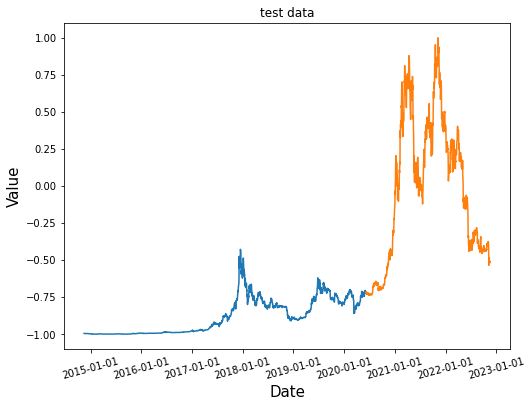

In [24]:
from matplotlib.dates import DateFormatter
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(data_main["date"][win:idx],y_train)
ax.plot(data_main["date"][idx:],y_test)
myFmt = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(myFmt)
plt.setp(ax.get_xticklabels(), rotation = 15)
plt.title("test data")
plt.xlabel('Date', fontsize=15)
plt.ylabel('Value', fontsize=15)
plt.show()

# **LSTM**

In [25]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from tensorflow import keras


#initialisizng the model 
lstm_model= Sequential()
lstm_model.add(LSTM(units=250,return_sequences=True,
                    input_shape=(x_train.shape[1],x_train.shape[2])))
lstm_model.add(LSTM(units=128))
lstm_model.add(Dropout(0.25)) #avoid overfitting in LSTM
lstm_model.add(Dense(units=1))

#----- compile model
opt = keras.optimizers.Adam(learning_rate=0.0001)
lstm_model.compile(optimizer='adam',loss='mean_squared_error')
lstm_model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 250)           253000    
                                                                 
 lstm_1 (LSTM)               (None, 128)               194048    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 447,177
Trainable params: 447,177
Non-trainable params: 0
_________________________________________________________________


In [26]:
hist_lstm_model=lstm_model.fit(x_train,y_train,epochs=100,
                        validation_data=(x_test,y_test)
                        ,batch_size=256)

Epoch 1/100
8/8 [==============================] - 9s 145ms/step - loss: 0.1469 - val_loss: 0.0746
Epoch 2/100
8/8 [==============================] - 0s 29ms/step - loss: 0.0251 - val_loss: 0.0820
Epoch 3/100
8/8 [==============================] - 0s 28ms/step - loss: 0.0124 - val_loss: 0.0648
Epoch 4/100
8/8 [==============================] - 0s 28ms/step - loss: 0.0081 - val_loss: 0.0620
Epoch 5/100
8/8 [==============================] - 0s 28ms/step - loss: 0.0069 - val_loss: 0.0474
Epoch 6/100
8/8 [==============================] - 0s 29ms/step - loss: 0.0058 - val_loss: 0.0391
Epoch 7/100
8/8 [==============================] - 0s 27ms/step - loss: 0.0055 - val_loss: 0.0286
Epoch 8/100
8/8 [==============================] - 0s 28ms/step - loss: 0.0044 - val_loss: 0.0207
Epoch 9/100
8/8 [==============================] - 0s 28ms/step - loss: 0.0044 - val_loss: 0.0153
Epoch 10/100
8/8 [==============================] - 0s 29ms/step - loss: 0.0042 - val_loss: 0.0110
Epoch 11/100
8/8 [

In [27]:
result_array=[]
algorithm_name=[]

In [28]:
from sklearn import metrics
import math

y_pred=lstm_model.predict(x_test)
lbl_real=y_test

mse=metrics.mean_squared_error(lbl_real, y_pred)
rmse = math.sqrt(mse)
mape=metrics.mean_absolute_percentage_error(lbl_real, y_pred)
mae=metrics.mean_absolute_error(lbl_real,y_pred)
r2= metrics.r2_score(lbl_real, y_pred)

# acc error
err = abs(y_test- y_pred)
diff = sum(err) / len(err)
accr = 100 - np.mean(diff)

result_array.append([mse,rmse,mape,mae,r2,accr])
algorithm_name.append("LSTM")


28/28 [==============================] - 1s 5ms/step


In [29]:
from sklearn.preprocessing import MinMaxScaler
data_normal=data_ready.copy()
sce=MinMaxScaler(feature_range=(-1,1))
data_col=data_ready["Close"].values.reshape(-1,1)
sce.fit(data_col)
y_train_real  = sce.transform(y_train.reshape(-1,1))
y_test_real  = sce.transform(y_test.reshape(-1,1))
pred_real=sce.transform(y_pred.reshape(-1,1))

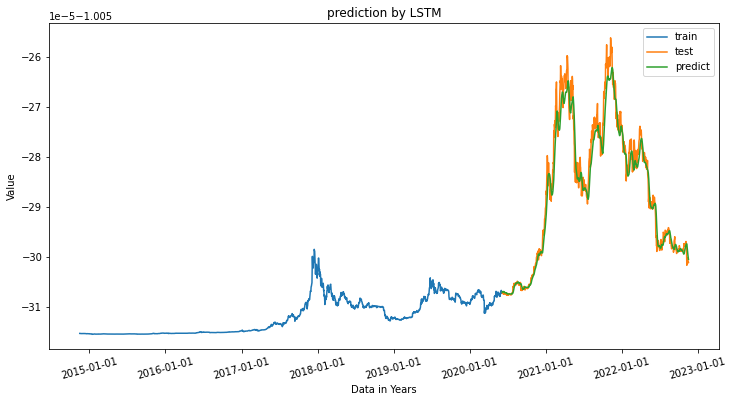

In [30]:
from matplotlib.dates import DateFormatter
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(data_main["date"][win:idx],y_train_real)
ax.plot(data_main["date"][idx:],y_test_real)
ax.plot(data_main["date"][idx:],pred_real)
myFmt = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(myFmt)
plt.setp(ax.get_xticklabels(), rotation = 15)
plt.legend(["train","test","predict"])
plt.title("prediction by LSTM")
plt.xlabel('Data in Years', fontsize=10)
plt.ylabel('Value', fontsize=10)
plt.show()

# **CNN**

In [31]:
x_train.shape

(2029, 60, 2)

In [32]:
from keras.models import Sequential
from keras.layers import Conv2D,AveragePooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from tensorflow import keras


#initialisizng the model 
cnn_model= Sequential()
cnn_model.add(Conv2D(filters=128,kernel_size=(2,2),strides=(2,1), padding="same",
                      input_shape=(x_train.shape[1],x_train.shape[2],1)))
cnn_model.add(Conv2D(filters=256,kernel_size=(2,2),strides=(2,1),padding="same"))
cnn_model.add(AveragePooling2D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dropout(0.01)) 
cnn_model.add(Dense(units=1))

#----- compile model
opt = keras.optimizers.Adam(learning_rate=0.0001)
cnn_model.compile(optimizer='adam',loss='mean_squared_error')
cnn_model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 2, 128)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 2, 256)        131328    
                                                                 
 average_pooling2d (AverageP  (None, 7, 1, 256)        0         
 ooling2D)                                                       
                                                                 
 flatten (Flatten)           (None, 1792)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1792)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 1793      
                                                      

In [33]:
hist_cnn_model=cnn_model.fit(x_train,y_train,epochs=100,
                        validation_data=(x_test,y_test)
                        ,batch_size=256)

Epoch 1/100
8/8 [==============================] - 5s 49ms/step - loss: 0.2067 - val_loss: 0.2874
Epoch 2/100
8/8 [==============================] - 0s 11ms/step - loss: 0.0520 - val_loss: 0.3314
Epoch 3/100
8/8 [==============================] - 0s 10ms/step - loss: 0.0194 - val_loss: 0.3203
Epoch 4/100
8/8 [==============================] - 0s 11ms/step - loss: 0.0115 - val_loss: 0.2747
Epoch 5/100
8/8 [==============================] - 0s 10ms/step - loss: 0.0074 - val_loss: 0.3067
Epoch 6/100
8/8 [==============================] - 0s 9ms/step - loss: 0.0060 - val_loss: 0.2553
Epoch 7/100
8/8 [==============================] - 0s 10ms/step - loss: 0.0052 - val_loss: 0.2676
Epoch 8/100
8/8 [==============================] - 0s 9ms/step - loss: 0.0047 - val_loss: 0.2340
Epoch 9/100
8/8 [==============================] - 0s 10ms/step - loss: 0.0044 - val_loss: 0.2293
Epoch 10/100
8/8 [==============================] - 0s 9ms/step - loss: 0.0040 - val_loss: 0.2076
Epoch 11/100
8/8 [====

In [34]:
from sklearn import metrics
import math

y_pred=cnn_model.predict(x_test)
lbl_real=y_test

mse=metrics.mean_squared_error(lbl_real, y_pred)
rmse = math.sqrt(mse)
mape=metrics.mean_absolute_percentage_error(lbl_real, y_pred)
mae=metrics.mean_absolute_error(lbl_real,y_pred)
r2= metrics.r2_score(lbl_real, y_pred)

# acc error
err = abs(y_test- y_pred)
diff = sum(err) / len(err)
accr = 100 - np.mean(diff)

result_array.append([mse,rmse,mape,mae,r2,accr])
algorithm_name.append("CNN")


28/28 [==============================] - 0s 3ms/step


In [35]:
from sklearn.preprocessing import MinMaxScaler
data_normal=data_ready.copy()
sce=MinMaxScaler(feature_range=(-1,1))
data_col=data_ready["Close"].values.reshape(-1,1)
sce.fit(data_col)
y_train_real  = sce.transform(y_train.reshape(-1,1))
y_test_real  = sce.transform(y_test.reshape(-1,1))
pred_real=sce.transform(y_pred.reshape(-1,1))

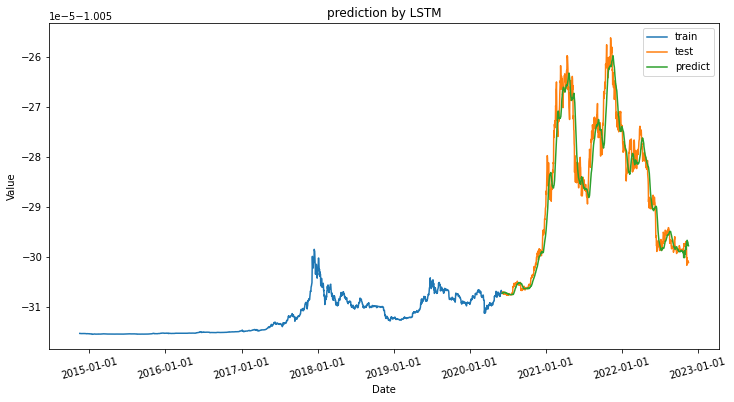

In [36]:
from matplotlib.dates import DateFormatter
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(data_main["date"][win:idx],y_train_real)
ax.plot(data_main["date"][idx:],y_test_real)
ax.plot(data_main["date"][idx:],pred_real)
myFmt = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(myFmt)
plt.setp(ax.get_xticklabels(), rotation = 15)
plt.legend(["train","test","predict"])
plt.title("prediction by LSTM")
plt.xlabel('Date', fontsize=10)
plt.ylabel('Value', fontsize=10)
plt.show()

# **GRU**

In [37]:
from keras.models import Sequential
from keras.layers import GRU
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from tensorflow import keras


#initialisizng the model 
gru_model= Sequential()
gru_model.add(GRU(units=128,return_sequences=True,
                    input_shape=(x_train.shape[1],x_train.shape[2])))
gru_model.add(GRU(units=256))
gru_model.add(Dropout(0.3)) 
gru_model.add(Dense(units=1))

#----- compile model
opt = keras.optimizers.Adam(learning_rate=0.0001)
gru_model.compile(optimizer='adam',loss='mean_squared_error')
gru_model.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 60, 128)           50688     
                                                                 
 gru_1 (GRU)                 (None, 256)               296448    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 347,393
Trainable params: 347,393
Non-trainable params: 0
_________________________________________________________________


In [38]:
hist_gru_model=gru_model.fit(x_train,y_train,epochs=100,
                        validation_data=(x_test,y_test)
                        ,batch_size=256)

Epoch 1/100
8/8 [==============================] - 4s 121ms/step - loss: 0.2427 - val_loss: 0.0897
Epoch 2/100
8/8 [==============================] - 0s 26ms/step - loss: 0.0361 - val_loss: 0.0848
Epoch 3/100
8/8 [==============================] - 0s 29ms/step - loss: 0.0126 - val_loss: 0.1041
Epoch 4/100
8/8 [==============================] - 0s 25ms/step - loss: 0.0072 - val_loss: 0.0750
Epoch 5/100
8/8 [==============================] - 0s 25ms/step - loss: 0.0059 - val_loss: 0.0804
Epoch 6/100
8/8 [==============================] - 0s 30ms/step - loss: 0.0047 - val_loss: 0.0642
Epoch 7/100
8/8 [==============================] - 0s 26ms/step - loss: 0.0041 - val_loss: 0.0570
Epoch 8/100
8/8 [==============================] - 0s 26ms/step - loss: 0.0034 - val_loss: 0.0474
Epoch 9/100
8/8 [==============================] - 0s 24ms/step - loss: 0.0030 - val_loss: 0.0384
Epoch 10/100
8/8 [==============================] - 0s 29ms/step - loss: 0.0030 - val_loss: 0.0315
Epoch 11/100
8/8 [

In [39]:
from sklearn import metrics
import math

y_pred=gru_model.predict(x_test)
lbl_real=y_test

mse=metrics.mean_squared_error(lbl_real, y_pred)
rmse = math.sqrt(mse)
mape=metrics.mean_absolute_percentage_error(lbl_real, y_pred)
mae=metrics.mean_absolute_error(lbl_real,y_pred)
r2= metrics.r2_score(lbl_real, y_pred)

# acc error
err = abs(y_test- y_pred)
diff = sum(err) / len(err)
accr = 100 - np.mean(diff)

result_array.append([mse,rmse,mape,mae,r2,accr])
algorithm_name.append("GRU")


28/28 [==============================] - 1s 5ms/step


In [40]:
from sklearn.preprocessing import MinMaxScaler
data_normal=data_ready.copy()
sce=MinMaxScaler(feature_range=(-1,1))
data_col=data_ready["Close"].values.reshape(-1,1)
sce.fit(data_col)
y_train_real  = sce.transform(y_train.reshape(-1,1))
y_test_real  = sce.transform(y_test.reshape(-1,1))
pred_real=sce.transform(y_pred.reshape(-1,1))

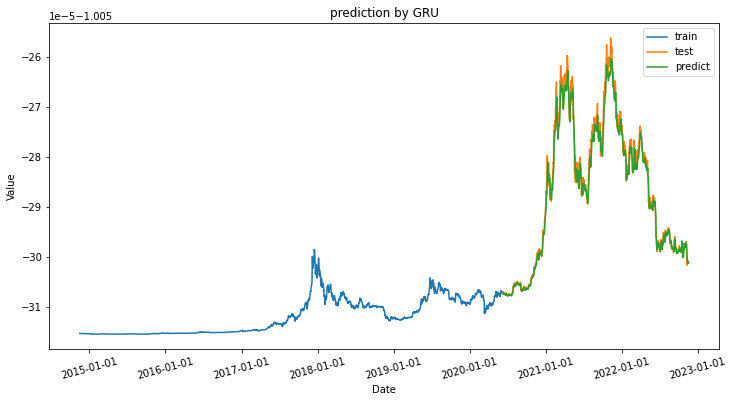

In [41]:
from matplotlib.dates import DateFormatter
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(data_main["date"][win:idx],y_train_real)
ax.plot(data_main["date"][idx:],y_test_real)
ax.plot(data_main["date"][idx:],pred_real)
myFmt = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(myFmt)
plt.setp(ax.get_xticklabels(), rotation = 15)
plt.legend(["train","test","predict"])
plt.title("prediction by GRU")
plt.xlabel('Date', fontsize=10)
plt.ylabel('Value', fontsize=10)
plt.show()

# **result**

In [54]:
data_res=pd.DataFrame(result_array,columns=["MSE","RMSE","MAPE","MAE","R2","Accr"])
data_res["Algorithm"]=algorithm_name
data_res=data_res[["Algorithm","MSE","RMSE","MAPE","MAE","R2","Accr"]]
data_res

,Algorithm,MSE,RMSE,MAPE,MAE,R2,Accr
0,LSTM,0.007969,0.089268,0.515843,0.061272,0.965061,99.468010
1,CNN,0.014783,0.121585,0.700475,0.084308,0.935185,99.457048
2,GRU,0.003327,0.057681,0.372870,0.040123,0.985412,99.461768


In [55]:
data_res.to_excel("res_bit.xlsx")

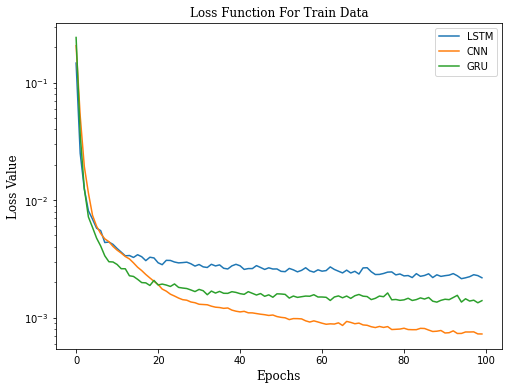

In [56]:
plt.figure(figsize=(8,6))
plt.semilogy(hist_lstm_model.history["loss"])
plt.semilogy(hist_cnn_model.history["loss"])
plt.semilogy(hist_gru_model.history["loss"])
plt.legend(algorithm_name)
plt.title('Loss Function For Train Data', fontname='serif', fontsize=12)
plt.xlabel('Epochs', fontname='serif', fontsize=12)
plt.ylabel('Loss Value', fontname='serif', fontsize=12)
plt.show()

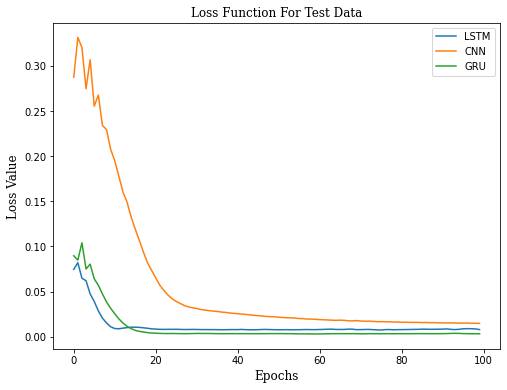

In [57]:
plt.figure(figsize=(8,6))
plt.plot(hist_lstm_model.history["val_loss"])
plt.plot(hist_cnn_model.history["val_loss"])
plt.plot(hist_gru_model.history["val_loss"])
plt.legend(algorithm_name)
plt.title('Loss Function For Test Data', fontname='serif', fontsize=12)
plt.xlabel('Epochs', fontname='serif', fontsize=12)
plt.ylabel('Loss Value', fontname='serif', fontsize=12)
plt.show()

# **future**

In [58]:
from sklearn.preprocessing import MinMaxScaler
data_normal=data_ready.copy()
sce=MinMaxScaler(feature_range=(-1,1))
for col_name in (data_ready.columns):
  print(col_name)
  data_col=data_ready[col_name].values.reshape(-1,1)
  data_normal[col_name]=sce.fit_transform(data_col)

Close
score


In [59]:
# gru_model
# lstm_model
# cnn_model

In [60]:
data_col=data_ready["Close"].values.reshape(-1,1)
sce.fit(data_col)

MinMaxScaler(feature_range=(-1, 1))

In [61]:
model_final=gru_model
last_time_plot=[-5,-4,-3,-2,-1]
real_lbl=y_test[last_time_plot].reshape(-1,1)
pred_lbl=model_final.predict(x_test[last_time_plot])

1/1 [==============================] - 0s 19ms/step


In [62]:
pred_price=sce.inverse_transform(pred_lbl).reshape(pred_lbl.shape[0]).tolist()
real_price=sce.inverse_transform(real_lbl).reshape(real_lbl.shape[0]).tolist()

In [63]:
import pandas as pd
data_pred=pd.DataFrame(columns=["real price","pred price"])
data_pred["real price"]=real_price
data_pred["pred price"]=pred_price
data_pred

,real price,pred price
0,16353.365234,16657.056641
1,16618.199219,16340.417969
2,16884.613281,16316.372070
3,16669.439453,16496.550781
4,16518.601562,16493.675781


In [64]:
data_hybrid=data_normal.values
last_win=data_hybrid[-win:,:]
last_win=last_win.reshape(1,last_win.shape[0],last_win.shape[1])
last_win.shape

(1, 60, 2)

In [65]:
lbl_future=model_final.predict(last_win)
lbl_future=lbl_future.reshape(-1,1)
price_future=sce.inverse_transform(lbl_future)
print(f'future price : {price_future.tolist()[0][0]}')

1/1 [==============================] - 0s 21ms/step
future price : 16382.55859375
